#Abstract
This notebook aims to create the pedictive models of whether the customer will default to pay credit card bill in the coming month and interpret them. The steps include using pip installations and importing libraries. Proceeding further, a minimum memory size and a run time is set and 50% of availible resources are being used for the analysis and prediction after which H2O server starts on a random port. The data is then imported and studied. The Column ID, as it's irrelavant for prediction, hence the column is dropped. The Model is then trained Using H2O's AutoML. GBM Model is predicted by the AutoML. After which, RMSE comparison and understanding the leader board is done. Plotting of Variable importance plot and Partial Dependence Plots is depicted.



#About the data set

There are 25 variables:

ID: ID of each client

LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit

SEX: Gender (1=male, 2=female)

EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

MARRIAGE: Marital status (1=married, 2=single, 3=others)

AGE: Age in years

PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)

PAY_2: Repayment status in August, 2005 (scale same as above)

PAY_3: Repayment status in July, 2005 (scale same as above)

PAY_4: Repayment status in June, 2005 (scale same as above)

PAY_5: Repayment status in May, 2005 (scale same as above)

PAY_6: Repayment status in April, 2005 (scale same as above)

BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)

BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)

BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)

BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)

BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)

BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)

PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)

PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)

PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)

PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)

PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)

PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)

default.payment.next.month: Default payment (1=yes, 0=no)

#Installing H2O.ai Automl for Python to run this notebook

Use pip install

In [ ]:
!pip install requests
! pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future

!pip uninstall h2o

!pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Found existing installation: h2o 3.38.0.2
Uninstalling h2o-3.38.0.2:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/h2o-3.38.0.2.dist-info/*
    /usr/local/lib/python3.7/dist-packages/h2o/*
Proceed (y/n)? y
  Successfully uninstalled h2o-3.38.0.2
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html
  Using cached h2o-3.38.0.2-py2.py3-none-any.whl


Importing libraries

In [ ]:
import h2o
from h2o.automl import H2OAutoML
import random, os, sys
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np
import matplotlib.pyplot as plt

Set a minimum memory size and a run time in seconds

In [ ]:
min_mem_size=6 
run_time=222

Use 50% of availible resources

In [ ]:
pct_memory=0.5
virtual_memory=psutil.virtual_memory()
min_mem_size=int(round(int(pct_memory*virtual_memory.available)/1073741824,0))
print(min_mem_size)

3


Start the H2O server on a random port

In [ ]:
# 65535 Highest port no
# Start the H2O server on a random port
port_no=random.randint(5555,55555)

try:
  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
except:
  logging.critical('h2o.init')
  h2o.download_all_logs(dirname=logs_path, filename=logfile)      
  h2o.cluster().shutdown()
  sys.exit(2)

Checking whether there is an H2O instance running at http://localhost:30471 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.16" 2022-07-19; OpenJDK Runtime Environment (build 11.0.16+8-post-Ubuntu-0ubuntu118.04); OpenJDK 64-Bit Server VM (build 11.0.16+8-post-Ubuntu-0ubuntu118.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.7/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpg4bmkaxb
  JVM stdout: /tmp/tmpg4bmkaxb/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpg4bmkaxb/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:30471
Connecting to H2O server at http://127.0.0.1:30471 ... successful.


H2O_cluster_uptime:,04 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.38.0.2
H2O_cluster_version_age:,11 days
H2O_cluster_name:,H2O_from_python_unknownUser_95pgcj
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.172 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


#Import, Manage and Understand Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
#Importing pandas and numpy
import pandas as pd
import numpy as np

url = "/content/drive/MyDrive/credit_df.csv"
df = h2o.import_file(path = url)
# Dataset is now stored in a Pandas Dataframe

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
df.head()

ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
6,50000,1,1,2,37,0,0,0,0,0,0,64400,57069,57608,19394,19619,20024,2500,1815,657,1000,1000,800,0
7,500000,1,1,2,29,0,0,0,0,0,0,367965,412023,445007,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
8,100000,2,2,2,23,0,-1,-1,0,0,-1,11876,380,601,221,-159,567,380,601,0,581,1687,1542,0
9,140000,2,3,1,28,0,0,2,0,0,0,11285,14096,12108,12211,11793,3719,3329,0,432,1000,1000,1000,0
10,20000,1,3,2,35,-2,-2,-2,-2,-1,-1,0,0,0,0,13007,13912,0,0,0,13007,1122,0,0


Dropping the ID column as it's not relevant in our prediction 

In [ ]:
df = df.drop("ID")

In [ ]:
df.types

{'LIMIT_BAL': 'int',
 'SEX': 'int',
 'EDUCATION': 'int',
 'MARRIAGE': 'int',
 'AGE': 'int',
 'PAY_1': 'int',
 'PAY_2': 'int',
 'PAY_3': 'int',
 'PAY_4': 'int',
 'PAY_5': 'int',
 'PAY_6': 'int',
 'BILL_AMT1': 'int',
 'BILL_AMT2': 'int',
 'BILL_AMT3': 'int',
 'BILL_AMT4': 'int',
 'BILL_AMT5': 'int',
 'BILL_AMT6': 'int',
 'PAY_AMT1': 'int',
 'PAY_AMT2': 'int',
 'PAY_AMT3': 'int',
 'PAY_AMT4': 'int',
 'PAY_AMT5': 'int',
 'PAY_AMT6': 'int',
 'default.payment.next.month': 'int'}

In [ ]:
#Renaming the predictor variable for the ease of use

df.rename(columns={'default.payment.next.month':'def_pay'})

LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
50000,1,1,2,37,0,0,0,0,0,0,64400,57069,57608,19394,19619,20024,2500,1815,657,1000,1000,800,0
500000,1,1,2,29,0,0,0,0,0,0,367965,412023,445007,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
100000,2,2,2,23,0,-1,-1,0,0,-1,11876,380,601,221,-159,567,380,601,0,581,1687,1542,0
140000,2,3,1,28,0,0,2,0,0,0,11285,14096,12108,12211,11793,3719,3329,0,432,1000,1000,1000,0
20000,1,3,2,35,-2,-2,-2,-2,-1,-1,0,0,0,0,13007,13912,0,0,0,13007,1122,0,0


In [ ]:
df.describe()

Rows:30000
Cols:24

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
type,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int
mins,10000.0,1.0,0.0,0.0,21.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-165580.0,-69777.0,-157264.0,-170000.0,-81334.0,-339603.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,167484.32266666647,1.6037333333333323,1.8531333333333333,1.5518666666666652,35.4855,-0.016699999999999975,-0.13376666666666673,-0.16619999999999982,-0.2206666666666666,-0.2662,-0.2911000000000001,51223.33090000003,49179.075166666706,47013.15479999994,43262.948966666634,40311.40096666662,38871.7604,5663.580499999998,5921.163500000004,5225.6815,4826.076866666671,4799.387633333334,5215.502566666669,0.2212
maxs,1000000.0,2.0,6.0,3.0,79.0,8.0,8.0,8.0,8.0,8.0,8.0,964511.0,983931.0,1664089.0,891586.0,927171.0,961664.0,873552.0,1684259.0,896040.0,621000.0,426529.0,528666.0,1.0
sigma,129747.66156720235,0.4891291960902606,0.7903486597207291,0.5219696006132486,9.217904068090187,1.1238015279973343,1.197185973034553,1.1968675684465737,1.169138622402337,1.133187406002748,1.1499876256079027,73635.86057552957,71173.76878252834,69349.38742703684,64332.856133916284,60797.15577026487,59554.10753674571,16563.280354025766,23040.870402057237,17606.961469803104,15666.159744032,15278.305679144796,17777.465775435303,0.41506180569093337
zeros,0,0,14,54,0,14737,15730,15764,16455,16947,16286,2008,2506,2870,3195,3506,4020,5249,5396,5968,6408,6703,7173,23364
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,20000.0,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,-2.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,120000.0,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,2.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,90000.0,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0


In [ ]:
df.shape

(30000, 24)

In [ ]:
pct_rows=0.80
df_train, df_test = df.split_frame([pct_rows])

In [ ]:
print(df_train.shape)
print(df_test.shape)

(24064, 24)
(5936, 24)


In [ ]:
df_train.head()

LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
50000,1,1,2,37,0,0,0,0,0,0,64400,57069,57608,19394,19619,20024,2500,1815,657,1000,1000,800,0
500000,1,1,2,29,0,0,0,0,0,0,367965,412023,445007,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
100000,2,2,2,23,0,-1,-1,0,0,-1,11876,380,601,221,-159,567,380,601,0,581,1687,1542,0
140000,2,3,1,28,0,0,2,0,0,0,11285,14096,12108,12211,11793,3719,3329,0,432,1000,1000,1000,0
20000,1,3,2,35,-2,-2,-2,-2,-1,-1,0,0,0,0,13007,13912,0,0,0,13007,1122,0,0
200000,2,3,2,34,0,0,2,0,0,-1,11073,9787,5535,2513,1828,3731,2306,12,50,300,3738,66,0
260000,2,1,2,51,-1,-1,-1,-1,-1,2,12261,21670,9966,8517,22287,13668,21818,9966,8583,22301,0,3640,0


#Train Models Using H2O's AutoML

Set the features and target

In [ ]:
X=df.columns
print(X)

['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'def_pay']


Set target and predictor variables

In [ ]:
y ='def_pay'

X.remove(y) 

print(X)

['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']


Set up AutoML

H20 AutoML will automatically perform regression or classification depedending on the target data type.

In [ ]:
aml = H2OAutoML(max_runtime_secs=run_time, seed=1)

In [ ]:
aml.train(x=X,y=y,training_frame=df_train)

AutoML progress: |
18:33:59.273: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

█████████
18:34:29.280: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

██
18:34:34.140: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

███████
18:35:01.30: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.
18:35:01.904: _response param,

,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
mae,0.2662471,0.0027942,0.2646933,0.2639957,0.2710616,0.2659142,0.2655709
mean_residual_deviance,0.1331082,0.0027212,0.1316619,0.1305246,0.1375162,0.1337405,0.1320975
mse,0.1331082,0.0027212,0.1316619,0.1305246,0.1375162,0.1337405,0.1320975
null_deviance,824.8049,20.438625,826.3198,795.95917,851.4815,833.0288,817.235
r2,0.2231064,0.0046496,0.2283265,0.2232903,0.2163273,0.2262728,0.2213150
residual_deviance,640.6872,17.649557,637.6388,618.0339,666.95374,644.4956,636.31384
rmse,0.3648248,0.0037144,0.3628525,0.3612819,0.3708318,0.3657055,0.3634523
rmsle,0.2556263,0.0023758,0.2543544,0.2538907,0.2596970,0.2557316,0.2544575


In [ ]:
print(aml.leaderboard)

model_id                                                     rmse       mse       mae     rmsle    mean_residual_deviance
StackedEnsemble_AllModels_2_AutoML_1_20221107_183359     0.364863  0.133125  0.266289  0.255648                  0.133125
StackedEnsemble_BestOfFamily_3_AutoML_1_20221107_183359  0.365207  0.133376  0.266735  0.255813                  0.133376
StackedEnsemble_AllModels_1_AutoML_1_20221107_183359     0.365407  0.133522  0.267133  0.256089                  0.133522
GBM_5_AutoML_1_20221107_183359                           0.365691  0.13373   0.26846   0.25604                   0.13373
StackedEnsemble_BestOfFamily_2_AutoML_1_20221107_183359  0.365882  0.13387   0.267887  0.256601                  0.13387
GBM_1_AutoML_1_20221107_183359                           0.366007  0.133961  0.268854  0.25676                   0.133961
StackedEnsemble_BestOfFamily_1_AutoML_1_20221107_183359  0.366054  0.133996  0.268132  0.256762                  0.133996
GBM_2_AutoML_1_20221107_18

#RMSE comparison and understanding the leader board

The best models after running for a little under four minutes is around 0.005 about half of that of the 0.010 RMSE that we got our simple MLP in notebook one and a quarter of the 0.017 RMSE that we got with a simple MLP with the same independent variables.

When we run for a short time, under 10 minutes, our leaderboard will be biased towards tree-based methods as the deep learners take much more time to converge. It is impossible to see deep learners in the top 500 models when we run for less than 5 minutes.

We should still plot the results but before we do that let's discuss a big advantage of these models, model interpretability.

In [ ]:
model_index=0
glm_index=0
glm_model=''
aml_leaderboard_df=aml.leaderboard.as_data_frame()
models_dict={}
for m in aml_leaderboard_df['model_id']:
  models_dict[m]=model_index
  if 'StackedEnsemble' not in m:
    break 
  model_index=model_index+1  

for m in aml_leaderboard_df['model_id']:
  if 'GLM' in m:
    models_dict[m]=glm_index
    break  
  glm_index=glm_index+1     
models_dict

{'StackedEnsemble_AllModels_2_AutoML_1_20221107_183359': 0,
 'StackedEnsemble_BestOfFamily_3_AutoML_1_20221107_183359': 1,
 'StackedEnsemble_AllModels_1_AutoML_1_20221107_183359': 2,
 'GBM_5_AutoML_1_20221107_183359': 3,
 'GLM_1_AutoML_1_20221107_183359': 16}

Examine the Best Model

In [ ]:
print(model_index)
best_model = h2o.get_model(aml.leaderboard[model_index,'model_id'])

3


In [ ]:
best_model.algo

'gbm'

#Variable importance plot

Variable importance plots in tree-based methods provides a list of the most significant variables in descending order by a measure of the information in each variable. Remember that tree calculates the information content of each variable. A variable importance plot is just a bar chart of each variables information content in decreasing order.

It can show actual information estimates or standardized plots like the one below. In a standardized plot the most important variable is always given a value of 1.0. The other variables scores represent their percentage of information relative to the most important variable.

Notice that some varibales have almost no information content. Knowing this allows for feature selection by removing unimportant variables. This makes a model more effecient to run and helps prevent overfitting as the unimportant variables can fit noise and alter prediction efficiency.

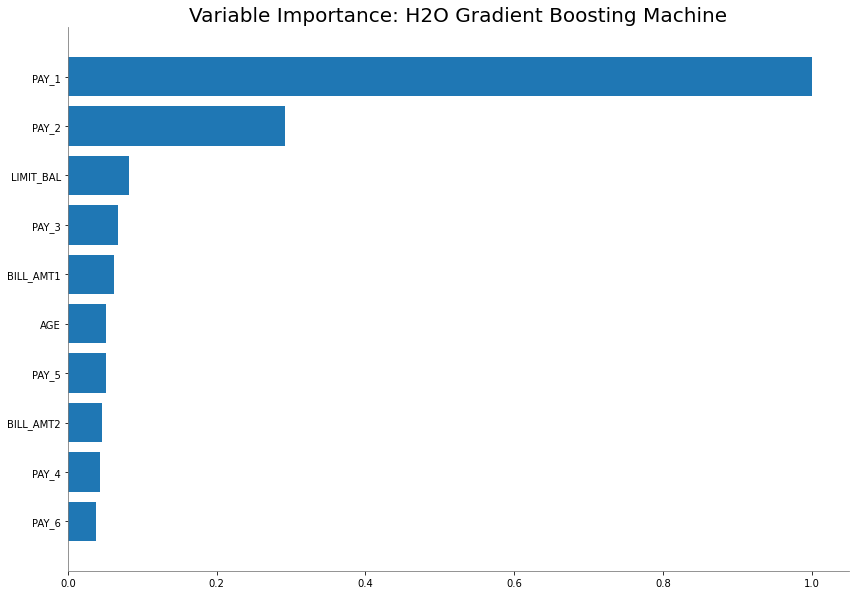

<Figure size 432x288 with 0 Axes>

In [ ]:
if best_model.algo in ['gbm','drf','xrt','xgboost']:
  best_model.varimp_plot()

16
glm


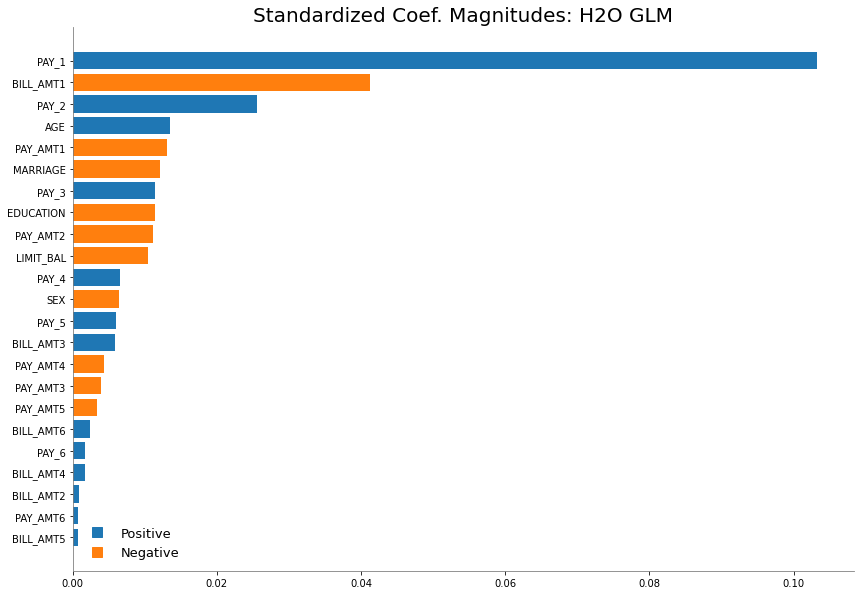

In [ ]:
if glm_index is not 0:
  print(glm_index)
  glm_model=h2o.get_model(aml.leaderboard[glm_index,'model_id'])
  print(glm_model.algo) 
  glm_model.std_coef_plot()

In [ ]:
print(best_model.rmse(train = True))

0.3497913650124223


In [ ]:
def model_performance_stats(perf):
    d={}
    try:    
      d['mse']=perf.mse()
    except:
      pass      
    try:    
      d['rmse']=perf.rmse() 
    except:
      pass      
    try:    
      d['null_degrees_of_freedom']=perf.null_degrees_of_freedom()
    except:
      pass      
    try:    
      d['residual_degrees_of_freedom']=perf.residual_degrees_of_freedom()
    except:
      pass      
    try:    
      d['residual_deviance']=perf.residual_deviance() 
    except:
      pass      
    try:    
      d['null_deviance']=perf.null_deviance() 
    except:
      pass      
    try:    
      d['aic']=perf.aic() 
    except:
      pass      
    try:
      d['logloss']=perf.logloss() 
    except:
      pass    
    try:
      d['auc']=perf.auc()
    except:
      pass  
    try:
      d['gini']=perf.gini()
    except:
      pass    
    return d

In [ ]:
mod_perf=best_model.model_performance(df_test)
stats_test={}
stats_test=model_performance_stats(mod_perf)
stats_test

{'mse': 0.13684225718600493,
 'rmse': 0.36992196094041907,
 'null_degrees_of_freedom': None,
 'residual_degrees_of_freedom': None,
 'residual_deviance': None,
 'null_deviance': None}

In [ ]:
predictions = best_model.predict(df_test)

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [ ]:
y_pred=h2o.as_list(predictions)
y_pred[0:5]

,predict
0,0.457920
1,0.101056
2,0.048717
3,0.135278
4,0.291813


In [ ]:
y_test=h2o.as_list(df_test[y])
y_test[0:5]

,def_pay
0,1
1,0
2,0
3,0
4,1


#Partial Dependence Plots
Partial dependence plots (PDP) show the dependence between the target response and a set of features, marginalizing over the values of all other features. Intuitively, we can interpret the partial dependence as the expected target response as a function of the feature.

The partial dependence plot gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. This helps one answer the question of how changing a variables values would change the outcome.

The partial dependence plots show only impact of single variable if others are kept constant. But in many cases, there is interaction between variables. So they are very useful in estimating whether, for example, doubling some predictor varible will double a response or whether that predictor varible is already saturated.

In [ ]:
print(X)

['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']


PartialDependencePlot progress: |████████████████████████████████████████████████| (done) 100%


[PartialDependence: Partial Dependence Plot of model GBM_5_AutoML_1_20221107_183359 on column 'PAY_6'.
pay_6    mean_response    stddev_response    std_error_mean_response
-------  ---------------  -----------------  -------------------------
-2       0.211468         0.183077           0.001057
-1       0.213115         0.180823           0.00104398
0        0.212283         0.182688           0.00105475
1        0.258331         0.18629            0.00107554
2        0.258331         0.18629            0.00107554
3        0.268534         0.193522           0.0011173
4        0.281539         0.18527            0.00106966
5        0.326575         0.170833           0.000986305
6        0.372534         0.151585           0.000875174
7        0.372534         0.151585           0.000875174
8        0.372534         0.151585           0.000875174]

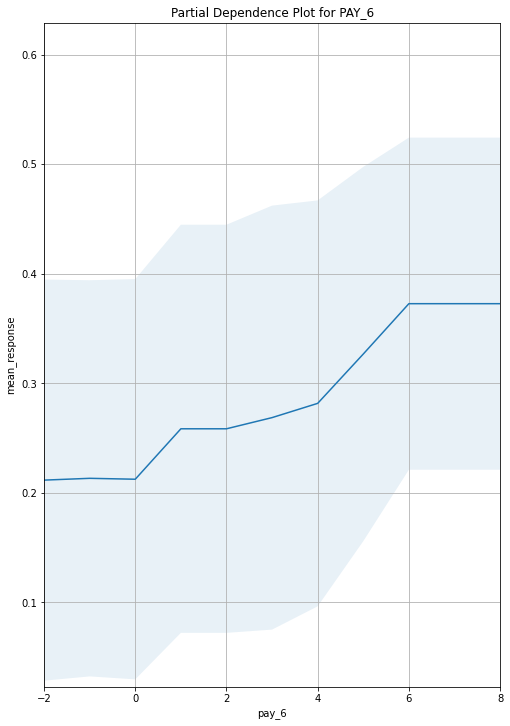

In [ ]:
best_model.partial_plot(df, cols=['PAY_6'])

PartialDependencePlot progress: |████████████████████████████████████████████████| (done) 100%


[PartialDependence: Partial Dependence Plot of model GBM_5_AutoML_1_20221107_183359 on column 'PAY_1'.
pay_1    mean_response    stddev_response    std_error_mean_response
-------  ---------------  -----------------  -------------------------
-2       0.182883         0.133232           0.000769212
-1       0.188078         0.13337            0.000770014
0        0.187211         0.134144           0.00077448
1        0.203393         0.134189           0.000774739
2        0.55591          0.138924           0.000802079
3        0.558172         0.141515           0.000817038
4        0.555804         0.134714           0.000777773
5        0.515681         0.139284           0.000804157
6        0.515681         0.139284           0.000804157
7        0.515681         0.139284           0.000804157
8        0.515681         0.139284           0.000804157,
 PartialDependence: Partial Dependence Plot of model GBM_5_AutoML_1_20221107_183359 on column 'PAY_2'.
pay_2    mean_response    s

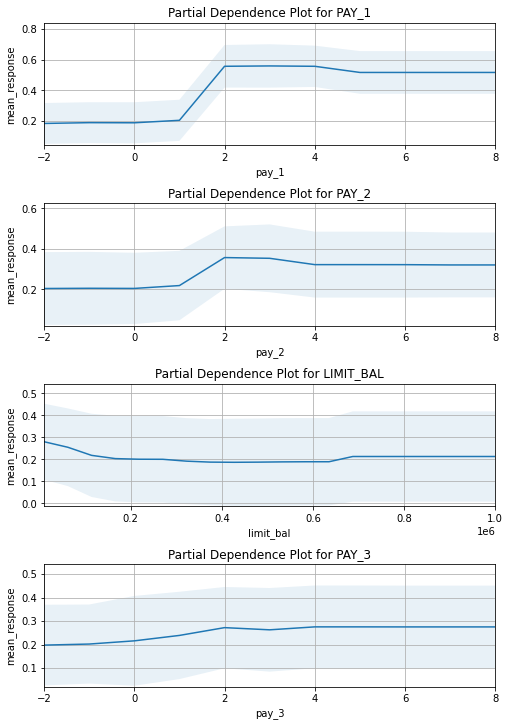

In [ ]:
best_model.partial_plot(df, cols=['PAY_1', 'PAY_2','LIMIT_BAL', 'PAY_3'])

From the above plots we can see that lesser the LIMIT_BALANCE the more the chances of defaulting.

Also the x-axis in PAY_1,2 is the number of months payments got delayed by a person. Those who deafulted for last 2 months are more likely to default the next month as well.

#Answering the questions

Question 1. Is the relationship significant?

Answer: As shown in the variable importance plot, we can see that PAY_1, PAY_2, LIMIT_BALANCE are significantly related with the def_pay column as compared to the Age & others.

Question 2. Are any model assumptions violated?

Answer: No, The assumptions are not violated as the prediction depends on the past repayment history & variable importance plot shows the same.

Question 3. Is there any multicollinearity in the model?

Answer: From the above partial dependence plot we see that only PAY_1 and PAY_2 has some correlation.

Question 4. In the multivariate models are predictor variables independent of all the other predictor variables?

Answer: According to above partial dependence plots, the predictor variables are independent of each other. Only the PAY_1 and PAY_2 are slightly dependent.

Question 5. In multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.

Answer: According to the variable importance plot generated, we can see that PAY_1 is the most significant whereas PAY_2 & LIMIT_BAL also play a role as significant predictor. The least significant predictors PAY_6, PAY_4, BILL_AMT2 are excluded.

Question 6. Does the model make sense?

Answer: As we see from the above preditions and models, GBM is the best predicted model for this case and the metrics MSE, RMSE as well.

Question 7. Does regularization help?

Answer: We found that once we tune in the different values, the MSE and RMSE does not improve, apart from that the metric value declines. So, we can say that the regularization doesn not help that much.

Question 8. Which independent variables are significant?

Answer: As from the variable importance graph; we can see that PAY_1, PAY_2, LIMIT_BAL, PAY_3 are significant.

Question 9. Which hyperparameters are important?

Answer: Hyperparameters are used to regulate the network structure. They genrally control the learning process and control the values of model parameters. The n_estimators and max_depth are used as hyperparameters here.

Question 10. Coding professionalism?

Answer: All the code written in this notebook has significant importance from installing h2O to plotting graphs. NO unnecessary churn is found in the code.

#Conclusion

The AutoML is used to predict the best fitting model and has been conlcuded that PAY_1, PAY_2, LIMIT_BAL, and PAY_3 play a major role in determinignthe default prediction. The RMSE value is calculated as 0.365691 & The best model is GBM_5_AutoML_1_20221107_183359 for which pairplots have been depicted.

#The MIT License

Copyright

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.